In [1]:
# !pip install diffusers transformers accelerate --upgrade

In [2]:
# !pip install ipywidgets ipyplot

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Fri_Nov__3_17:51:05_Pacific_Daylight_Time_2023
Cuda compilation tools, release 12.3, V12.3.103
Build cuda_12.3.r12.3/compiler.33492891_0


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

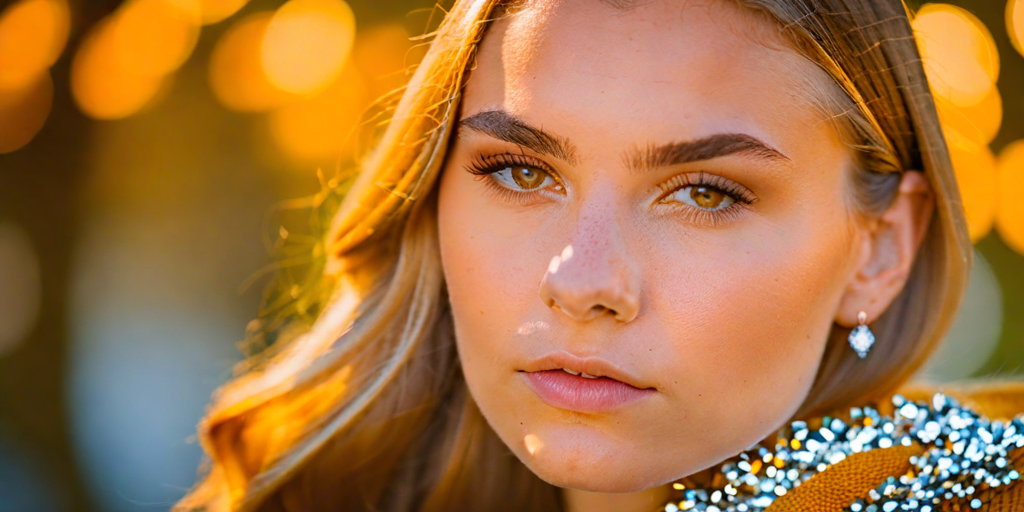

In [4]:
import torch
torch.cuda.is_available()

from diffusers import AutoPipelineForText2Image

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "a girl, 18 years old, soft-focus portraits, light amber and silver, dslr, ultra quality, sharp focus, Fujifilm XT3, crystal clear, 8K UHD"
pipe = pipe(
    prompt = prompt, 
    negative_prompt = 'disfigured, ugly, bad, immature, cartoon, anime, 3d, painting, b&w, camera, smile',
    num_inference_steps = 30, 
    guidance_scale = 5.0,
    height = 512,
    width = 1024
)
pipe.safety_checker = None
pipe.requires_safety_checker = False

image = pipe.images[0]
image